In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')

In [4]:
raw_data = loadmat('/home/teemo/ML/data/ex6data1.mat')
data = pd.DataFrame(raw_data.get('X'),columns=['X1','X2'])
data['y'] = raw_data.get('y')

data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [7]:
def plot_init_data(data,fig,ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]
    
    ax.scatter(positive['X1'],positive['X2'],s=50,marker='x',label='Positive')
    ax.scatter(negative['X1'],negative['X2'],s=50,marker='o',label='Negative')


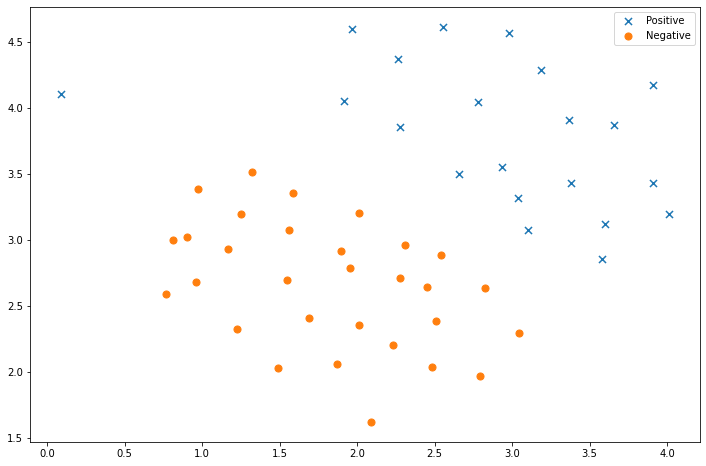

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
plot_init_data(data,fig,ax)
ax.legend()
plt.show()

In [11]:
from sklearn import svm
svc = svm.LinearSVC(C=1,loss='hinge',max_iter=10000)
svc

LinearSVC(C=1, loss='hinge', max_iter=10000)

In [12]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9803921568627451

In [78]:
def find_decision_boundary(svc,x1min,x1max,x2min,x2max,diff):
    x1 = np.linspace(x1min,x1max,1000)
    x2 = np.linspace(x2min,x2max,1000)
    
    cordinates = [(x,y) for x in x1 for y in x2]
    x_cord,y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    c_val['cval'] = svc.decision_function(c_val[['x1','x2']])
    
    decision = c_val[np.abs(c_val['cval']) < diff]
    
    return decision.x1,decision.x2

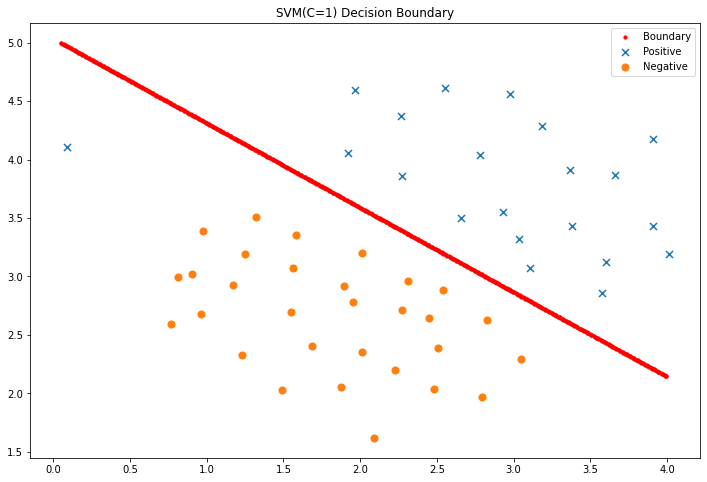

In [29]:
x1,x2 = find_decision_boundary(svc,0,4,1.5,5,1*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='r',label='Boundary')
plot_init_data(data,fig,ax)
ax.set_title('SVM(C=1) Decision Boundary')
ax.legend()
plt.show()


In [49]:
svc2 = svm.LinearSVC(C=100,loss='hinge',max_iter=10000)
svc2.fit(data[['X1','X2']],data['y'])
svc2.score(data[['X1','X2']],data['y'])

0.9803921568627451

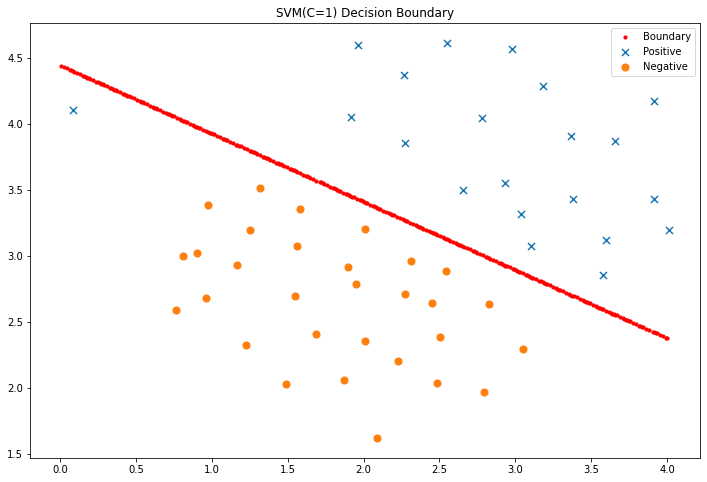

In [50]:
x1,x2 = find_decision_boundary(svc2,0,4,1.5,5,2*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='r',label='Boundary')
plot_init_data(data,fig,ax)
ax.set_title('SVM(C=1) Decision Boundary')
ax.legend()
plt.show()

In [51]:
#高斯内核的svm,可进行非线性分类
def geussian_kernel(x1,x2,sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2)/ (2 * (sigma ** 2))))

In [61]:
raw_data2 = loadmat('/home/teemo/ML/data/ex6data2.mat')

data2 = pd.DataFrame(raw_data2['X'],columns=['X1','X2'])
data2['y'] = raw_data2.get('y')
data2.head(4)

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1


In [62]:
def plot_init_data2(data,fig,ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]
    
    ax.scatter(positive['X1'],positive['X2'],s=50,marker='x',label='Positive')
    ax.scatter(negative['X1'],negative['X2'],s=50,marker='o',label='Negative')
    

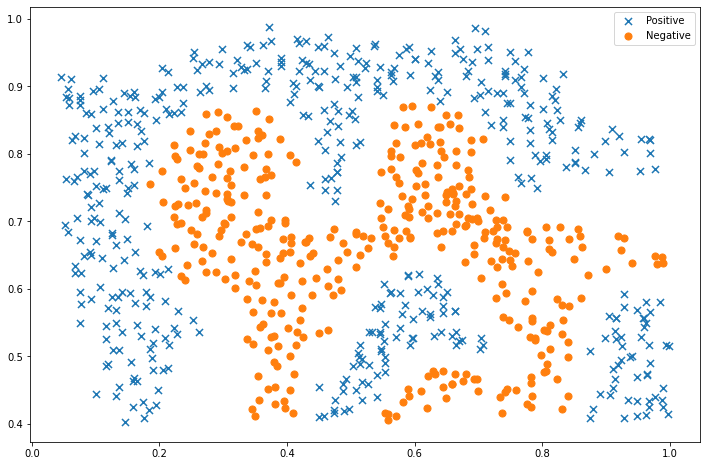

In [65]:
fig,ax = plt.subplots(figsize=(12,8))
plot_init_data2(data2,fig,ax)
ax.legend()
plt.show()

In [67]:
svc2 = svm.SVC(C=100,gamma=10,probability=True)
svc2

SVC(C=100, gamma=10, probability=True)

In [71]:
svc2.fit(data2[['X1','X2']],data2['y'])
svc2.score(data2[['X1',"X2"]],data2['y'])

0.9698725376593279

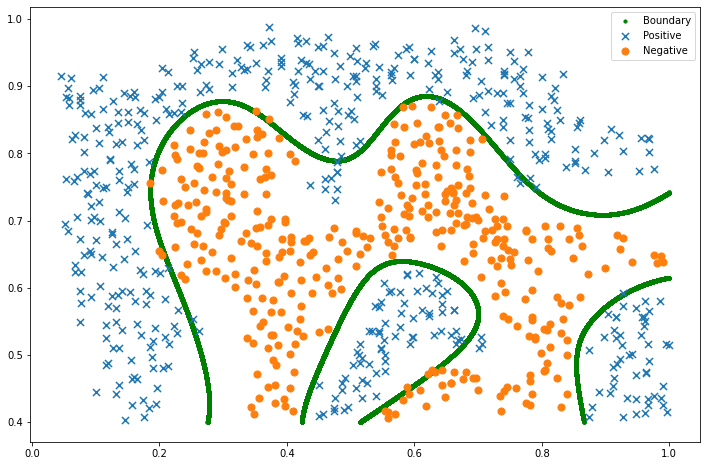

In [77]:
x1,x2 = find_decision_boundary(svc2,0,1.0,0.4,1.0,2*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='g',label='Boundary')
plot_init_data(data2,fig,ax)
ax.legend()
plt.show()

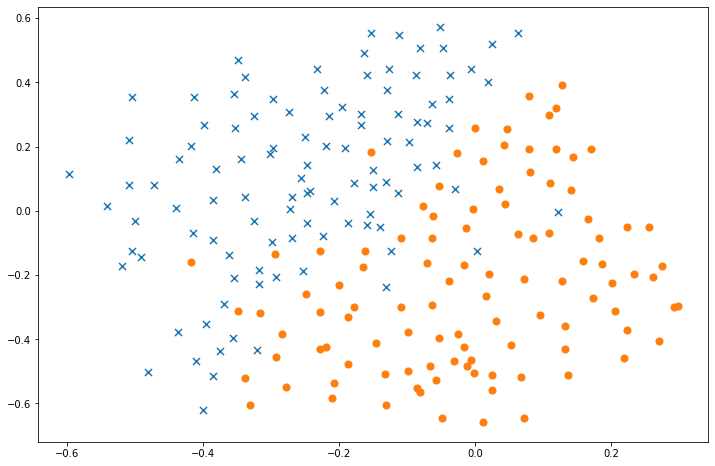

In [86]:
raw_data3 = loadmat('/home/teemo/ML/data/ex6data3.mat')

x3 = raw_data3['X']
x3_val = raw_data3['Xval']
y3 = raw_data3['y'].ravel()
y3_val = raw_data3['yval'].ravel()

fig,ax = plt.subplots(figsize=(12,8))
data3 = pd.DataFrame(x3,columns=['X1','X2'])
data3['y'] = raw_data3['y']
plot_init_data(data3,fig,ax)
plt.show()

In [88]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C':None,'gamma':None}

for C in C_values :
    for gamma in gamma_values:
        svc = svm.SVC(C=C,gamma=gamma)
        svc.fit(x3,y3)
        score = svc.score(x3_val,y3_val)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            
best_score,best_params

(0.965, {'C': 0.3, 'gamma': 100})

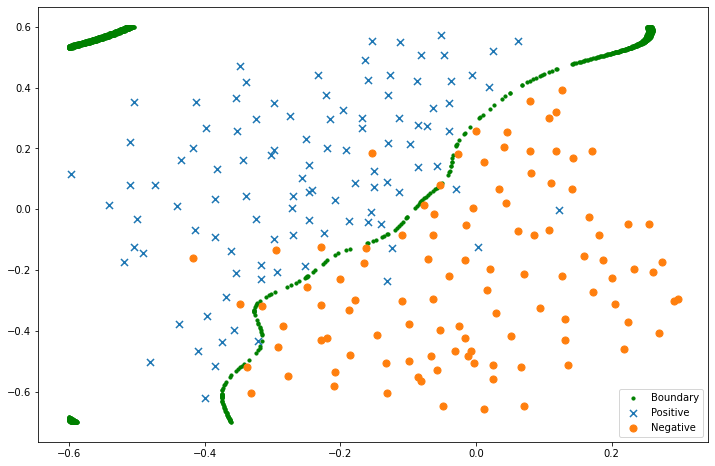

In [90]:
svc = svm.SVC(C=best_params['C'],gamma=best_params['gamma'])
svc.fit(x3,y3)

x1,x2 = find_decision_boundary(svc,-0.6,0.3,-0.7,0.6,1*10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='g',label='Boundary')
plot_init_data(data3,fig,ax)
ax.legend()
plt.show()

In [93]:
#垃圾邮件分类
train = loadmat('/home/teemo/ML/data/spamTrain.mat')
test = loadmat('/home/teemo/ML/data/spamTest.mat')
test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytest': array([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
      

In [94]:
x4 = train['X']
x4_test = test['Xtest']
y4 = train['y']
y4_test = test['ytest']


x4.shape,x4_test.shape,y4.shape,y4_test.shape

((4000, 1899), (1000, 1899), (4000, 1), (1000, 1))

In [140]:
# svc = svm.SVC()
# svc.fit(x4,y4)
# svc.score(x4,y4)

0.99325

In [141]:
svc.score(x4_test,y4_test)

0.987

In [98]:
from sklearn.model_selection import train_test_split
x4_train,x4_val,y4_train,y4_val = train_test_split(x4,y4,test_size=0.2)

In [99]:
# C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
# gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

# best_score = 0
# best_params = {'C':None,'gamma':None}

# for C in C_values :
#     for gamma in gamma_values:
#         svc = svm.SVC(C=C,gamma=gamma)
#         svc.fit(x4_train,y4_train)
#         score = svc.score(x4_val,y4_val)
        
#         if score > best_score:
#             best_score = score
#             best_params['C'] = C
#             best_params['gamma'] = gamma
            
# best_score,best_params

(0.98, {'C': 3, 'gamma': 0.01})

In [101]:
svc = svm.SVC(C=3,gamma=0.01)
svc.fit(x4,y4)

0.998

In [103]:
print('Training accuracy = {0}%'.format(np.round(svc.score(x4, y4) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(x4_test, y4_test) * 100, 2)))

Training accuracy = 99.8%
Test accuracy = 99.2%


In [142]:
kw = np.eye(1899)
spam_val = pd.DataFrame({'idx':range(1899)})

In [143]:
spam_val['isspam'] = svc.decision_function(kw)

In [144]:
spam_val['isspam'].describe()

count    1899.000000
mean       -0.110039
std         0.049094
min        -0.428396
25%        -0.131213
50%        -0.111985
75%        -0.091973
max         0.396286
Name: isspam, dtype: float64

In [136]:
decision = spam_val[(spam_val['isspam'] < 0.01) & (spam_val['isspam'] > -0.01)]
decision

,idx,isspam
24,24,-0.008955
70,70,-0.002049
73,73,0.009939
79,79,-0.005658
133,133,0.003814
210,210,-0.000271
224,224,0.006265
271,271,-0.008326
654,654,0.002946
675,675,-0.009110


In [137]:
path = '/home/teemo/ML/data/vocab.txt'
voc = pd.read_csv(path,header=None,names=['idx','voc'],sep='\t')
voc.head(5)

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [138]:
spamvoc = voc.loc[decision['idx']]
spamvoc

,idx,voc
24,25,address
70,71,an
73,74,and
79,80,anoth
133,134,august
210,211,break
224,225,but
271,272,chang
654,655,fix
675,676,forward
